# Analysis with Python  

This jupyter notebook is a demonstrator of an analysis workflow using python libraries.

# Setup Environment on Lxplus

- Install Miniconda (or Anaconda) for Python2.7, Linux 64 bit  
  [Miniconda](http://conda.pydata.org/miniconda.html)

- Install root inside the conda environment  
  ```conda install -c chrisburr root=6.06.02```  
 
- Install other packages  
    ```pip install numpy matplotlib scikit-learn```  

- Activate conda environment  
    ```source activate root```  
    root is the default name of conda environment  
    
- Install root_pandas :  
 It's the Igor's package which loads dataframes from TTrees   stored in root files and store them back in TTrees after   you're done.  
 ```conda install pandas  
    pip install root_pandas```  
    
- If you want to also create a jupyter notebook (like this one)  
    ```conda install jupyter```  
    
    


In [2]:
#imports needed for the project
%matplotlib inline
from matplotlib import pyplot as plt
import root_pandas
import numpy as np

#for legend of histogram
import matplotlib.patches as mpatches

Welcome to ROOTaaS 6.06/02


# 1. Loading MC and Data
This demonstrator uses ntuples from the charm production cross-section measurement analysis.

In [3]:
#loading dataframes using root_pandas library
file_path  ='root://eoslhcb.cern.ch//eos/lhcb/user/a/apearce/Impactkit/AnalysisWithPython/'
#numbers of events which will be loaded
n_events   = 100000
#branches which will be loaded in the memory
var_list   = ['Dp_M','Dp_Y','Dp_IPCHI2_OWNPV','Dp_FDCHI2_OWNPV','*_PT']

tuple_name = 'TupleDpToKpipi/DecayTree'

print "LOADING DATA"
df       = root_pandas.read_root(file_path+'DVntuple_Real.root',  columns=var_list,
                                 stop = n_events, key=          tuple_name)
df_cheat = root_pandas.read_root(file_path+'DVntuple_Cheat.root', columns=var_list, 
                                 stop = n_events, key='Cheated'+tuple_name)
print "DATA IS LOADED"

LOADING DATA
DATA IS LOADED


# 2. Data and MC comparison

## 2.1 Visualisation

Using matplotlib and pandas DataFrames, how can one make plots to checks MC Data (dis)agreement ?

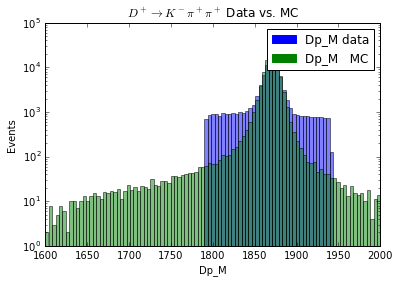

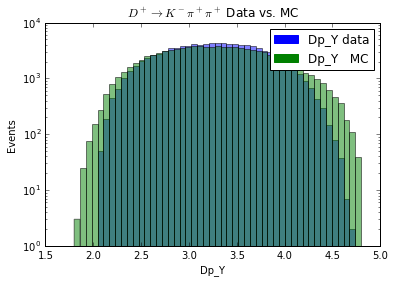

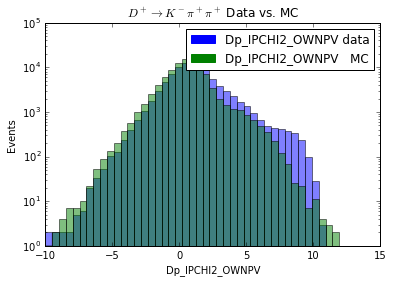

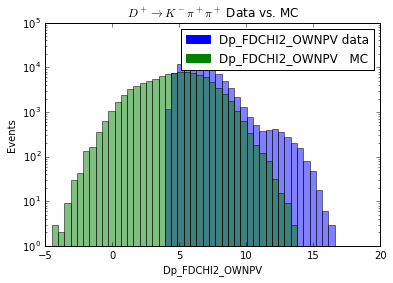

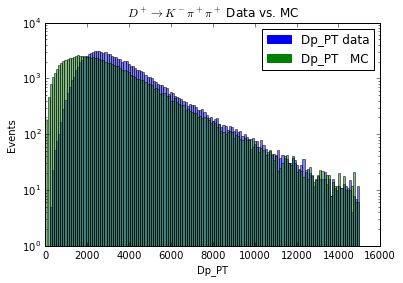

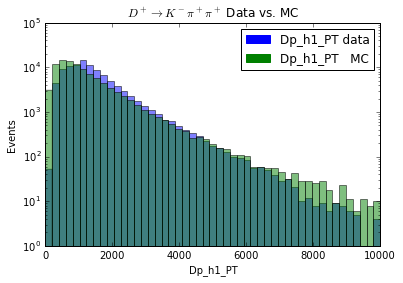

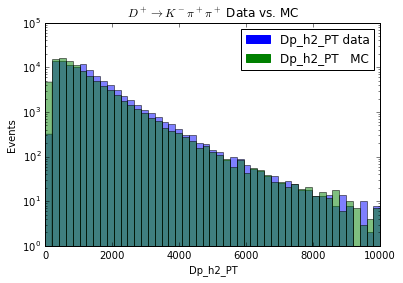

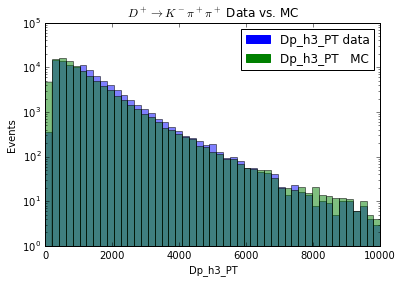

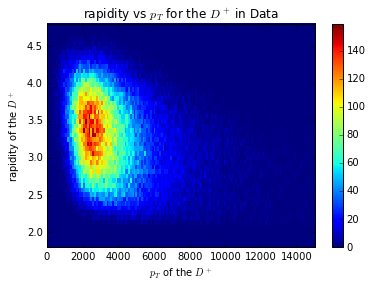

In [4]:
#df.columns will return the index of all the columns stored in the dataframe
vars_to_plot = df.columns

#a dictionnary to choose the binning scheme for each variable we want to plot
binning      = {'Dp_M' :np.linspace(1600, 2000, 100),
                'Dp_PT':np.linspace(0, 1.5e4, 150),
                'Dp_Y' :np.linspace(1.8, 4.8, 50),
             'Dp_h1_PT':np.linspace(0, 1e4, 50),
             'Dp_h2_PT':np.linspace(0, 1e4, 50),
             'Dp_h3_PT':np.linspace(0, 1e4, 50),
      'Dp_IPCHI2_OWNPV':np.linspace(-10., 15., 50),
      'Dp_FDCHI2_OWNPV':np.linspace(-5., 18., 50)
}

 
for var in vars_to_plot:
    #print var, binning[var]
    if 'OWNPV' not in var:
        data_hist = df[var].plot.hist(bins=binning[var],log=True,alpha=0.5,label = '{0} Data'.format(var))
        #df.query('Dp_M<1855 | Dp_M>1885')[var].plot.hist(bins=binning[var],log=True)
        #df.query('Dp_M>1855 & Dp_M<1885')[var].plot.hist(bins=binning[var],log=True)
        mc_hist = df_cheat[var].plot.hist(bins=binning[var],log=True,alpha=0.5,label = '{0} MC'.format(var))
    else:
        data_hist = np.log(df[var]).plot.hist(bins=binning[var],log=True,alpha=0.5,label = '{0} Data'.format(var))
        #df.query('Dp_M<1855 | Dp_M>1885')[var].plot.hist(bins=binning[var],log=True)
        #df.query('Dp_M>1855 & Dp_M<1885')[var].plot.hist(bins=binning[var],log=True)
        mc_hist   = np.log(df_cheat[var]).plot.hist(bins=binning[var],log=True,alpha=0.5,label = '{0}   MC'.format(var))

    data_patch = mpatches.Patch(color='blue' , label='{0} data'.format(var))
    mc_patch   = mpatches.Patch(color='green', label='{0}   MC'.format(var))

    plt.legend(handles=[data_patch,mc_patch])
    plt.ylabel('Events')
    plt.xlabel(var)
    plt.title(r"$D^+ \rightarrow K^- \pi^+ \pi^+$ Data vs. MC")
    plt.show()
    
# 2D PLOT
plt.hist2d(df['Dp_PT'], df['Dp_Y'], bins=[binning['Dp_PT'],binning['Dp_Y']])
plt.ylabel('rapidity of the $D^+$')
plt.xlabel('$p_T$ of the $D^+$')
plt.title(r'rapidity vs $p_T$ for the $D^+$ in Data')
plt.colorbar()



## 2.2 Cut-based selection

To be able to compare MC and Data, we need to apply the same cuts in both samples.
We need to apply Data cuts in the MC dataset.

In [7]:
# These are the cuts applied at the HLT2 step
hlt2_cut_string = 'Dp_PT_First > 1000.0 & Dp_PT_Second > 400.0 & Dp_PT_Third > 200.0 & \
                   Dp_h1_TRACK_CHI2NDOF < 3.0 & Dp_h2_TRACK_CHI2NDOF < 3.0 & Dp_h3_TRACK_CHI2NDOF < 3.0 & \
                   Dp_Loki_MIPCHI2DV_First > 50.0 & Dp_Loki_MIPCHI2DV_Second > 10.0 & \
                   Dp_Loki_MIPCHI2DV_Third > 4.0 & Dp_h2_PIDK < 5.0 & Dp_h3_PIDK < 5.0 & Dp_h1_PIDK > 5.0 & \
                   Dp_M > 1789.0 & Dp_M < 1949.0 & Dp_ENDVERTEX_CHI2/Dp_ENDVERTEX_NDOF < 25.0 & \
                   Dp_DIRA_OWNPV > 0.9994 & Dp_FDCHI2_OWNPV > 16.0 & Dp_Loki_BPVLTIME > 0.00015'

columns_for_cuts = ['Dp_PT_First', 'Dp_PT_Second', 'Dp_PT_Third', 'Dp_h1_TRACK_CHI2NDOF', 'Dp_h2_TRACK_CHI2NDOF',
                   'Dp_h3_TRACK_CHI2NDOF', 'Dp_Loki_MIPCHI2DV_First', 'Dp_Loki_MIPCHI2DV_Second', 
                   'Dp_Loki_MIPCHI2DV_Third', 'Dp_h2_PIDK', 'Dp_h3_PIDK', 'Dp_h1_PIDK', 'Dp_M',
                   'Dp_ENDVERTEX_CHI2', 'Dp_ENDVERTEX_NDOF', 'Dp_DIRA_OWNPV', 'Dp_FDCHI2_OWNPV', 'Dp_Loki_BPVLTIME']

# Loading the MC dataframe with 
df_cheat_for_cut = root_pandas.read_root(file_path+'DVntuple_Cheat.root', 
                                          columns=columns_for_cuts, stop = n_events, key='Cheated'+tuple_name)

df_cheat_reduced = df_cheat_for_cut.query(hlt2_cut_string)

print 'number of events before cuts : {0}, number of events after cuts : {1}'.format(len(df_cheat_for_cut.index), len(df_cheat_reduced.index))

number of events before cuts : 100000, number of events after cuts : 25391


# 3. MVA with MC signal sample and Data sidebands

Using scikit-learn to build a MVA Classifier for signal and background

In [ ]:
# TEST AND TRAINING SAMPLES CONTAIN SIGNAL AND BACKGROUND
X_test_data =  df.query('Dp_M<1850 | Dp_M>1890 & '+hlt2_cut_string)[features][:int(0.2*n_events)]

df_cheat = df_cheat.append(df_cheat_for_cut)
X_test_mc   =  df_cheat.query(hlt2_cut_string)[features][:int(0.2*n_events)]
X_test      =  X_test_data.append(X_test_mc,ignore_index = True).values

X_train_data =  df.query('Dp_M<1850 | Dp_M>1890 & '+hlt2_cut_string)[features][int(0.2*n_events):n_events]
X_train_mc   =  df_cheat.query(hlt2_cut_string)[features][int(0.2*n_events):n_events]
X_train      =  X_train_data.append(X_train_mc,ignore_index = True).values

y_test  = int(0.2*n_events)*[1]+int(0.2*n_events)*[0]
y_train = int(0.8*n_events)*[1]+int(0.8*n_events)*[0]

dt = DecisionTreeClassifier(max_depth=3,
                            min_samples_leaf=0.05*len(X_train))
bdt = AdaBoostClassifier(dt,
              algorithm='SAMME',
              n_estimators=800,
              learning_rate=0.5)

bdt.fit(X_train, y_train)
sk_y_predicted = bdt.predict(X_test)
print classification_report(y_test, sk_y_predicted, target_names=["background", "signal"])
print "Area under ROC curve: %.4f"%(roc_auc_score(y_test, sk_y_predicted))

plt.hist(bdt.decision_function(X_test_data).ravel(),color='r', alpha=0.5, range=(-0.4,0.4), bins=30)
plt.hist(bdt.decision_function(X_test_mc).ravel()  ,color='b', alpha=0.5, range=(-0.4,0.4), bins=30)
plt.xlabel("scikit-learn BDT output")

plt.show()